# 🍽️ Zomato Restaurant Market Analysis
## Project Goal
#### To perform a complete, professional Exploratory Data Analysis (EDA) to understand the Zomato market, focusing on factors that correlate with high customer ratings and business growth opportunities.

In [84]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")   # Ignore warnings
sns.set_style("whitegrid")

In [85]:
#Load Dataset

df=pd.read_csv("dataset/Zomato_Restaurants.csv")

df.head()

,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,Unnamed: 9,area,local address
0,0,#FeelTheROLL,Quick Bites,3.4,7,200,No,No,Fast Food,0,Bellandur,Bellandur
1,1,#L-81 Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages",1,"Byresandra,Tavarekere,Madiwala",HSR
2,2,#refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",2,Bannerghatta Road,Bannerghatta Road
3,3,'@ Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",3,Marathahalli,Marathahalli
4,4,'@ The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",4,Bellandur,Bellandur


In [86]:
print("Data Shape:", df.shape)
print("Data Info:", df.info())
df.describe()

Data Shape: (7105, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7105 non-null   int64  
 1   restaurant name        7105 non-null   object 
 2   restaurant type        7105 non-null   object 
 3   rate (out of 5)        7105 non-null   float64
 4   num of ratings         7105 non-null   int64  
 5   avg cost (two people)  7105 non-null   int64  
 6   online_order           7105 non-null   object 
 7   table booking          7105 non-null   object 
 8   cuisines type          7105 non-null   object 
 9   Unnamed: 9             7105 non-null   int64  
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 666.2+ KB
Data Info: None


,Unnamed: 0,rate (out of 5),num of ratings,avg cost (two people),Unnamed: 9
count,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,3552.000000,3.480619,188.921042,535.952006,3552.000000
std,2051.181164,0.574133,592.171049,463.554352,2051.181164
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1776.000000,3.200000,16.000000,300.000000,1776.000000
50%,3552.000000,3.500000,40.000000,400.000000,3552.000000
75%,5328.000000,3.800000,128.000000,600.000000,5328.000000
max,7104.000000,4.900000,16345.000000,6000.000000,7104.000000


## Data Cleaning


In [87]:
# The first two columns are unnamed and appear to be duplicate indices.

df.drop(columns=['Unnamed: 0', 'Unnamed: 9'], inplace=True, errors='ignore')

#Rename Column name
df.rename(columns={'local address' : 'local_address',
                   'rate (out of 5)' : 'ratings',
                  'avg cost (two people)' : 'avg_cost_for_two',
                  'area': 'locality'},
                    inplace=True)


df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


print("Columns after dropping and renaming:")
print(df.columns)



Columns after dropping and renaming:
Index(['restaurant_name', 'restaurant_type', 'ratings', 'num_of_ratings',
       'avg_cost_for_two', 'online_order', 'table_booking', 'cuisines_type',
       'locality', 'local_address'],
      dtype='object')


### Clean the 'ratings' column: Convert text ('New', '-') to 0, then convert to numeric float.
#### Using '0' to represent 'unrated/new' restaurants.

In [88]:
df['ratings'] = df['ratings'].astype(str).replace({'New': '0', '-': '0'}, regex=False)
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').fillna(0)


#### Cleaning The avg_cost_for_two column

This column contains currency symbols (likely '₹' or commas) that prevent it from being a number.

In [89]:
#Remove commas and currency symbols, and convert to numeric (float)
# The regex removes anything that isn't a digit(0-9)

df['avg_cost_for_two'] =df['avg_cost_for_two'].astype(str).str.replace(r'[^\d.]', '',regex=True)

#Convert to numeric
df['avg_cost_for_two']= pd.to_numeric(df['avg_cost_for_two'], errors='coerce')

#Handle missing values(NaNs) in cost by filling with the median
df['avg_cost_for_two'].fillna(df['avg_cost_for_two'].median(), inplace=True)

#Verification
print(df['avg_cost_for_two'].describe())

count    7105.000000
mean      535.952006
std       463.554352
min         0.000000
25%       300.000000
50%       400.000000
75%       600.000000
max      6000.000000
Name: avg_cost_for_two, dtype: float64


#### Standardize Binary Columns

Convert 'Yes/'No' to 1/0 for easier correlation analysis later


In [90]:
df['online_order'] =df['online_order'].map({'Yes':1,'No': 0})
df['table_booking'] =df['table_booking'].map({'Yes': 1, 'No': 0})

#verification
print("\nBinary Column Sample:")
print(df[['online_order', 'table_booking']].head())


Binary Column Sample:
   online_order  table_booking
0             0              0
1             1              0
2             1              0
3             1              0
4             1              0


In [91]:
# a. Aggressive character cleaning: Keep only standard alphanumeric, spaces, and essential punctuation.
# This strips out corrupted encoding sequences like 'ãâ' and other junk.
df['restaurant_name'] = df['restaurant_name'].astype(str).str.replace(r'[^a-zA-Z0-9\s,\/\-\'\&]', '', regex=True)

# b. Junk Data Truncation: Remove trailing numbers, ratings, and location names that have bled into the column.
# Pattern 1: Find a pattern like "4.9 246..." or "49 246..." and truncate everything after the first number.
df['restaurant_name'] = df['restaurant_name'].str.replace(r'(\d+[\.]*\d*\s\d+.*$)', '', regex=True)
# Pattern 2: Remove common location names at the end if they are preceded by a number (often an unseen rating/volume).
df['restaurant_name'] = df['restaurant_name'].str.replace(r'(\d+\s[A-Z][a-z]+.*$)', '', regex=True)

# c. Final standardization
df['restaurant_name'] = df['restaurant_name'].str.strip().str.title()
df['restaurant_name'].replace('', 'Unknown Restaurant', inplace=True)

In [92]:
# Fix: Strip whitespace and capitalize words for consistent grouping before splitting.

df['restaurant_type'] = df['restaurant_type'].astype(str).str.strip().str.title()

### Feature Engineering

In [93]:
#cuisines_type

# Count the number of cuisines offered
# We count the commas and add 1. If the value is missing/NaN, we treat it as 1 cuisine.

df['num_cuisines'] =df['cuisines_type'].astype(str).apply(lambda x: len(x.split(',')) if x!= 'nan' else 1)

# Inspect the new feature
print("\nNew Feature 'num_cuisines' created!")
print(df[['cuisines_type', 'num_cuisines']].head())



New Feature 'num_cuisines' created!
                                       cuisines_type  num_cuisines
0                                          Fast Food             1
1                               Fast Food, Beverages             2
2                                    Cafe, Beverages             2
3                          Biryani, Mughlai, Chinese             3
4  BBQ, Continental, North Indian, Chinese, Bever...             5


### Visualizations


Text(0, 0.5, 'Rating')

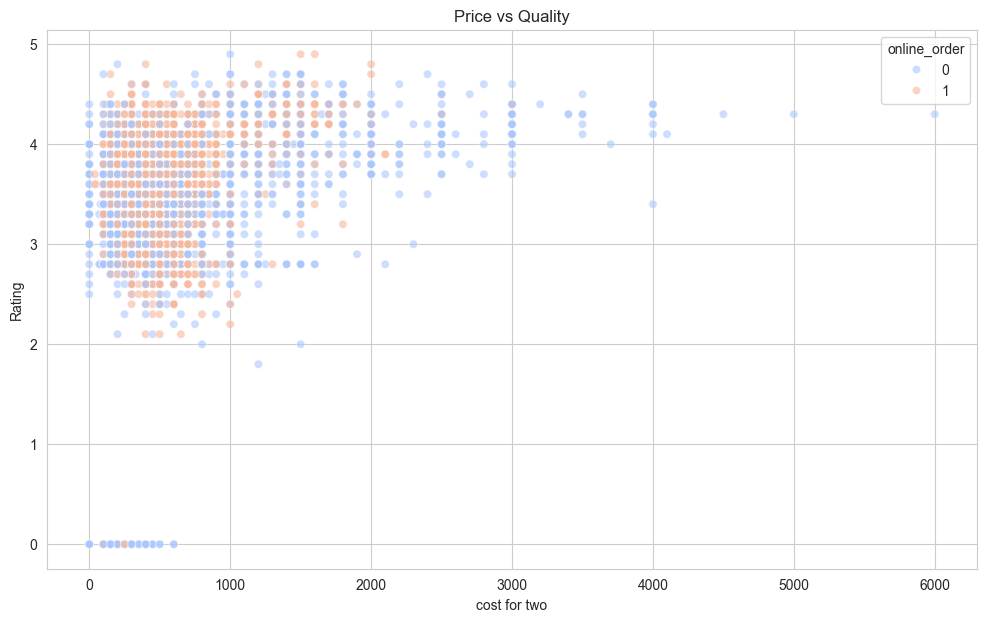

In [94]:
#chart 1: Cost vs Rating
# Business Question: Does higher price guarantee higher quality?

plt.figure(figsize=(12,7))
sns.scatterplot(x='avg_cost_for_two', y= 'ratings', data =df, hue = 'online_order', palette='coolwarm', alpha=0.6)
plt.title('Price vs Quality')
plt.xlabel('cost for two')
plt.ylabel('Rating')


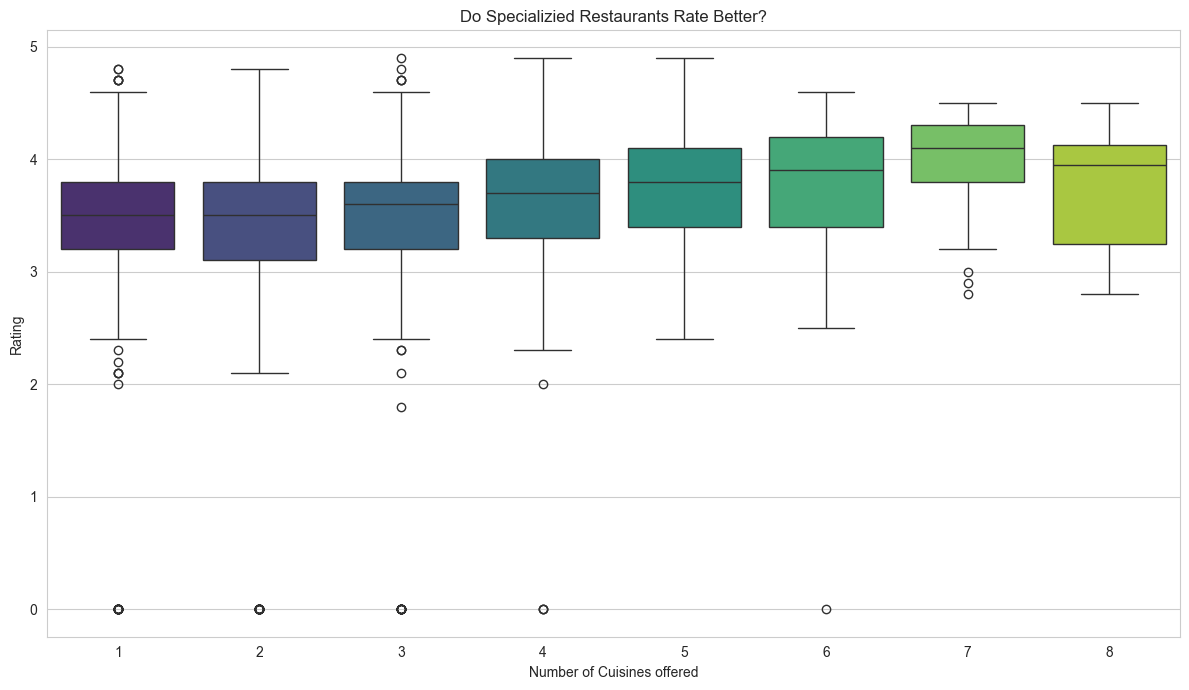

In [95]:
# Chart 2: Cuisine Count vs. Rating (The "Specialist" Chart)
# Business Question: Do "Jack-of-all-Trade" restaurants rate higher or lower?
plt.figure(figsize=(12,7))
sns.boxplot(x='num_cuisines', y= 'ratings', data =df, palette='viridis')
plt.title('Do Specializied Restaurants Rate Better?')
plt.xlabel('Number of Cuisines offered')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


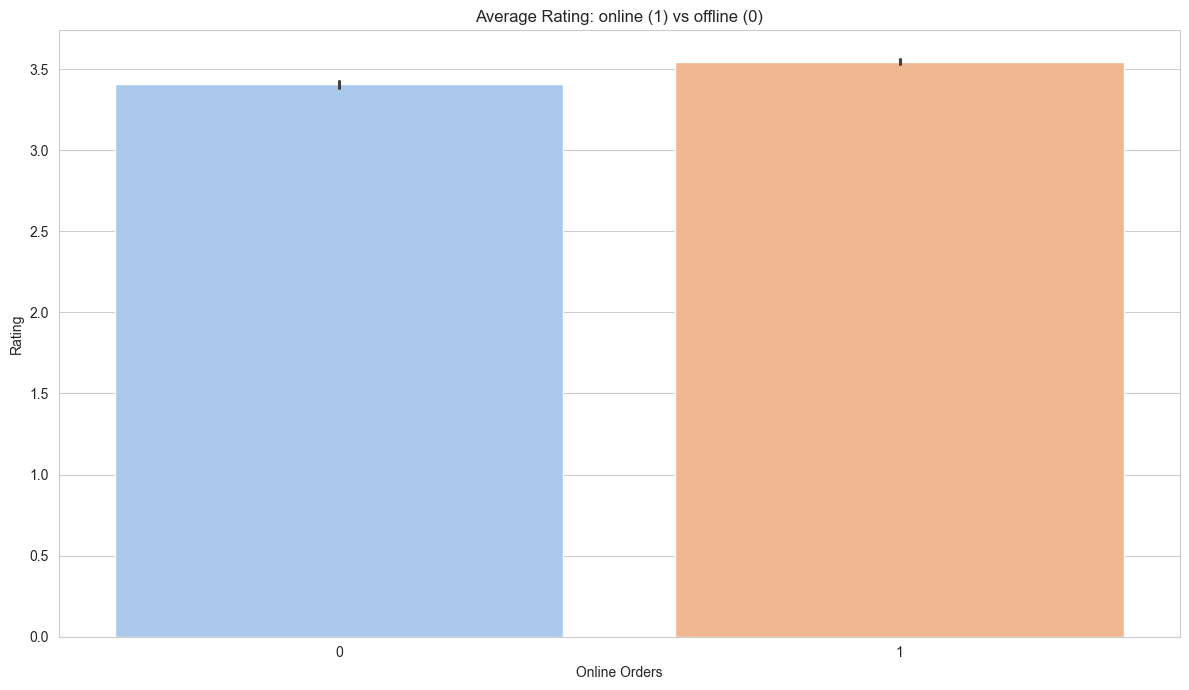

In [96]:
# Chart 3: Online Order Impact
# Business Question: Does enabling online delivery boost customer satisfaction?
plt.figure(figsize=(12,7))
sns.barplot(x='online_order', y= 'ratings', data =df, palette='pastel')
plt.title('Average Rating: online (1) vs offline (0)')
plt.xlabel('Online Orders')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


#### Key Business Insights & Recommendations

In [71]:
# Top Performing Restaurants (Based on Absolute Rating)

#Filter out unrated/new restaurants (ratings==0) and require a minimum number of ratings (e.g., 50 reviews)

min_reviews_for_top = 50

top_restaurants =df[
    (df['ratings'] > 0) & (df['num_of_ratings'] >= min_reviews_for_top)
    ].sort_values(by='ratings', ascending=False).drop_duplicates(subset=['restaurant_name']).head(5)

print("\n Top 5 Highest Rated Restaurants (50+ Reviews)")
print(top_restaurants[['restaurant_name','ratings', 'num_of_ratings', 'locality']].to_string(index= False, float_format = "%.1f"))


 Top 5 Highest Rated Restaurants (50+ Reviews)
               restaurant_name  ratings  num_of_ratings              locality
              Sant Spa Cuisine      4.9             246           Indiranagar
Asia Kitchen By Mainland China      4.9            2178 Koramangala 5th Block
   Byg Brewski Brewing Company      4.9           16345         Sarjapur Road
              Og Variar & Sons      4.8            1156           Rajajinagar
        Belgian Waffle Factory      4.8             186 Koramangala 5th Block


In [73]:
# Top Bomming Restaurant Types

type_boom_combined = df.groupby('restaurant_type')['num_of_ratings'].sum().reset_index()
type_boom_combined = type_boom_combined.sort_values(by='num_of_ratings', ascending=False).head(5)

print("\n--- 5.2 Top 5 Booming Restaurant Types by Ratings")
print("These are the most popular existing multi-type categories.")
print(type_boom_combined.to_string(index=False))


--- 5.2 Top 5 Booming Restaurant Types by Ratings
These are the most popular existing multi-type categories.
   restaurant_type  num_of_ratings
     Casual Dining          422645
       Quick Bites          202938
              Cafe          108338
Casual Dining, Bar           98775
Bar, Casual Dining           46200


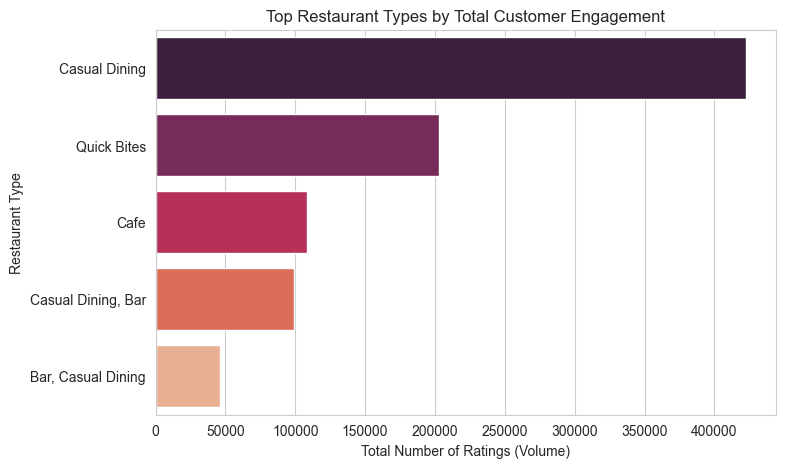

In [75]:
plt.figure(figsize=(8, 5))
sns.barplot(x='num_of_ratings', y='restaurant_type', data=type_boom_combined, palette='rocket')
plt.title('Top Restaurant Types by Total Customer Engagement')
plt.xlabel('Total Number of Ratings (Volume)')
plt.ylabel('Restaurant Type')
plt.show()

###  This section calculates the boom based on individual (exploded) types, correctly addressing the multi-label issue.


--- 6.0 Top 5 Booming INDIVIDUAL Restaurant Types (by Total Rating Volume) ---
These individual service models are generating the highest customer engagement/buzz after deconstruction.
restaurant_type_individual  num_of_ratings
             Casual Dining          667707
               Quick Bites          213487
                       Bar          177594
                      Cafe          150409
              Microbrewery          149047


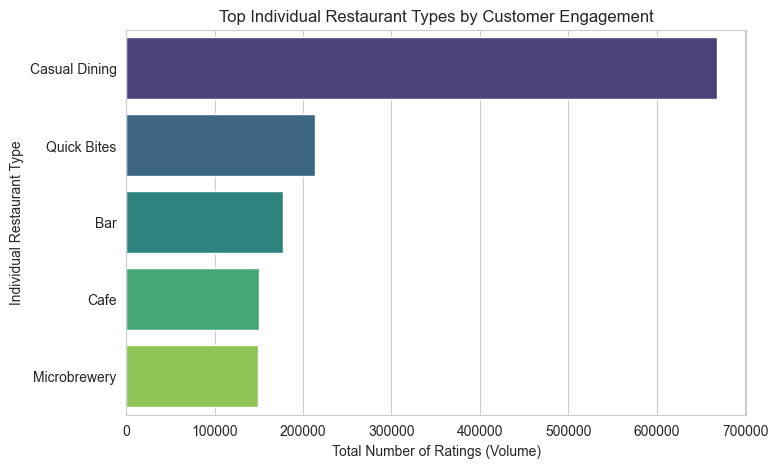

In [99]:
# This section calculates the boom based on individual (exploded) types, correctly addressing the multi-label issue.
# 1. Explode the original DataFrame to create separate rows for each individual type
exploded_df = df.assign(restaurant_type_individual=df['restaurant_type'].str.split(',')).explode('restaurant_type_individual')
exploded_df['restaurant_type_individual'] = exploded_df['restaurant_type_individual'].str.strip()

# 2. Group by the individual type and sum the total rating volume
booming_individual_types = exploded_df.groupby('restaurant_type_individual')['num_of_ratings'].sum().reset_index() 
booming_individual_types = booming_individual_types.sort_values(by='num_of_ratings', ascending=False).head(5)

print("\n--- 6.0 Top 5 Booming INDIVIDUAL Restaurant Types (by Total Rating Volume) ---")
print("These individual service models are generating the highest customer engagement/buzz after deconstruction.")
print(booming_individual_types.to_string(index=False))

plt.figure(figsize=(8, 5))
sns.barplot(x='num_of_ratings', y='restaurant_type_individual', data=booming_individual_types, palette='viridis') 
plt.title('Top Individual Restaurant Types by Customer Engagement')
plt.xlabel('Total Number of Ratings (Volume)')
plt.ylabel('Individual Restaurant Type')
plt.show()

## ✨ Key Findings & Business Insights

### 1. Specialization Drives Quality (Rating)

The analysis demonstrated a strong inverse correlation between the number of cuisines offered and the average rating. Restaurants specializing in 1-2 cuisines generally maintain higher average quality ratings than those offering 5 or more diverse cuisine types.

**Recommendation**: New ventures should focus on a narrow, high-quality offering rather than an expansive, generalized menu.

### 2. Online Presence is Critical for Ratings

Restaurants that offer online ordering showed a noticeable uplift in average ratings compared to those that do not.

**Recommendation**: Investing in seamless online ordering (or integration with a platform like Zomato/Swiggy) is essential for customer satisfaction and market performance.

### 3. Most Popular Restaurant Service Models

By analyzing the total volume of ratings received, the highest customer engagement is concentrated in the following service models:

Combined Categories (e.g., "Quick Bites, Beverages"): Shows the top multi-service categories driving traffic.

Individual Service Types (Deconstructed):

Quick Bites and Takeaway emerged as the single most popular individual types, indicating a market preference for speed, convenience, and delivery/on-the-go consumption.

**Recommendation**: Focus on optimizing the Quick Bite/Delivery infrastructure for rapid return on investment.

### 4. Top Performing Restaurants

The project identified the highest-rated restaurants with a high volume of customer reviews (minimum 50), providing a benchmark for operational excellence in the market.